In [27]:
# Day25 Assignment Batch1 AIML 
# Venkkatesh V R 
# Building Classificaion Model using Naive Bayes Theorem

In [28]:
# import the neccessary libraries

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix


import warnings
warnings.filterwarnings('ignore')


# Naive Bayes Theorem

##  Titanic dataset Classification Model

In [29]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
data1 = pd.read_csv('test.csv')
data1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [31]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [32]:
data.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [33]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


In [35]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [36]:
# Encode
le = LabelEncoder()
data.Sex = le.fit_transform(data['Sex'])
data.Embarked = le.fit_transform(data['Embarked'])

In [37]:
feature_cols = ['Survived','Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked' ]
X = data[feature_cols]
X.drop(columns=['Age'],axis=1,inplace=True)
X

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,2
1,1,1,0,1,0,71.2833,0
2,1,3,0,0,0,7.9250,2
3,1,1,0,1,0,53.1000,2
4,0,3,1,0,0,8.0500,2
...,...,...,...,...,...,...,...
884,0,2,1,0,0,13.0000,2
885,1,1,0,0,0,30.0000,2
886,0,3,0,1,2,23.4500,2
887,1,1,1,0,0,30.0000,0


In [38]:
y = data[['Pclass']]

y

,Pclass
0,3
1,1
2,3
3,1
4,3
...,...
884,2
885,1
886,3
887,1


In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.2,
                                                random_state=3,)

In [40]:
X_train.head()
X

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,2
1,1,1,0,1,0,71.2833,0
2,1,3,0,0,0,7.9250,2
3,1,1,0,1,0,53.1000,2
4,0,3,1,0,0,8.0500,2
...,...,...,...,...,...,...,...
884,0,2,1,0,0,13.0000,2
885,1,1,0,0,0,30.0000,2
886,0,3,0,1,2,23.4500,2
887,1,1,1,0,0,30.0000,0


In [41]:
y_train.head()

,Pclass
287,2
735,3
857,3
591,3
524,3


In [42]:
#Fit the model 
classifier = BernoulliNB()
classifier.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Accuracy Score: 0.5112359550561798


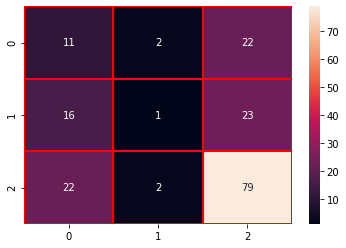

In [43]:
#prediction
y_pred = classifier.predict(X_test)#Accuracy

#from sklearn import metrics
print('Accuracy Score:', accuracy_score(y_test,y_pred,normalize=True))
confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidths=1, linecolor='red')

In [44]:
y_test.shape

(178, 1)

**prediction score 0.511. Total 91 records predicted correctly out of  178 records**



Feature :  Survived
Model Details 
IDV : ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'] 
DV : ['Survived']
The accuracy score is: 0.797752808988764
The confusion matrix is: 
 [[101   9]
 [ 27  41]]
Total records successfully predicted 142 out of 178 Records


Feature :  Pclass
Model Details 
IDV : ['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'] 
DV : ['Pclass']
The accuracy score is: 0.5112359550561798
The confusion matrix is: 
 [[11  2 22]
 [16  1 23]
 [22  2 79]]
Total records successfully predicted 91 out of 178 Records


Feature :  Sex
Model Details 
IDV : ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'] 
DV : ['Sex']
The accuracy score is: 0.797752808988764
The confusion matrix is: 
 [[ 40   9]
 [ 27 102]]
Total records successfully predicted 142 out of 178 Records


Feature :  SibSp
Model Details 
IDV : ['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked'] 
DV : ['SibSp']
The accuracy score is: 0.6910112359550562
T

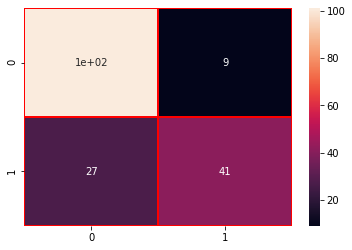

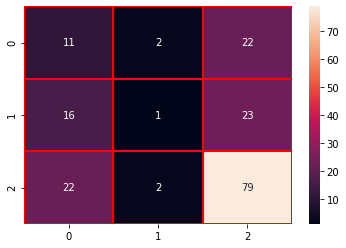

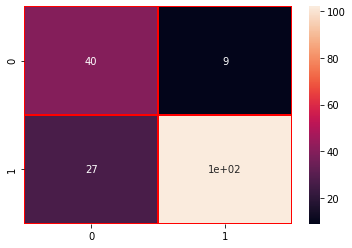

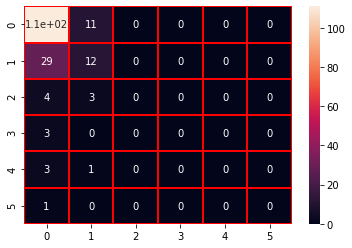

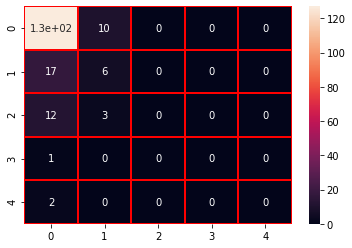

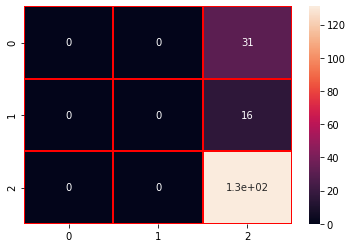

In [45]:
# To perform for other feature cols

def NB_Model():
    feature_cols = ['Survived','Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked' ]
    model_cols = ['Survived','Pclass','Sex','SibSp','Parch','Embarked' ]
    for j, i in enumerate(model_cols):
        print("\n\nFeature : ",i)
        X = data[feature_cols]
        X.drop(columns=[i],axis=1,inplace=True)
        y = data[[i]]
        X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.2,
                                                random_state=3,)
        #Fit the model 
        classifier = BernoulliNB()
        classifier.fit(X_train,y_train)

        #prediction
        y_pred = classifier.predict(X_test)
        cm = confusion_matrix(y_test,y_pred)
        diagonal_sum = cm.trace()
        sum_of_all_elements = cm.sum()
        
        #Accuracy from sklearn import metrics
        print(f"Model Details \nIDV : {list(X.columns)} \nDV : {list(y.columns)}" )
        print("The accuracy score is:",accuracy_score(y_test,y_pred,normalize=True))
        print("The confusion matrix is: \n",cm)
        print(f"Total records successfully predicted {diagonal_sum} out of {sum_of_all_elements} Records")

        #Accuracy from sklearn import metrics
        #print(f" Model Details \n IDV : {list(X.columns)} \n DV : {list(y.columns)}" )
        #print('Accuracy Score:', accuracy_score(y_test,y_pred,normalize=True))
        #print(confusion_matrix(y_test,y_pred))
        plt.figure(j)
        sns.heatmap(cm,annot=True,linewidths=1, linecolor='red')
              
NB_Model()


In [46]:
# End of Assignment